In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import os

from numpy.random import seed
seed(101)



In [2]:
meta = pd.read_csv("HAM10000_metadata.csv")
meta.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


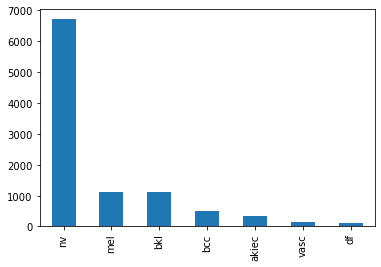

In [3]:
meta.dx.value_counts().plot.bar(rot=90)

In [4]:
meta.dx.value_counts()[:4]

nv     6705
mel    1113
bkl    1099
bcc     514
Name: dx, dtype: int64

In [5]:
classes = list(meta.dx.value_counts().keys())[0:4]
meta = meta[meta.dx.isin(classes)]
print (classes)

['nv', 'mel', 'bkl', 'bcc']


In [6]:
clss={}
for num,name in enumerate(classes):
    clss[name]=num

print (clss)

def label_encode(label):
    return clss[label]

meta["class"] = meta.dx.apply(label_encode)
meta.sample(5)

{'nv': 0, 'mel': 1, 'bkl': 2, 'bcc': 3}


,lesion_id,image_id,dx,dx_type,age,sex,localization,class
8045,HAM_0002607,ISIC_0032744,nv,consensus,25.0,male,unknown,0
4094,HAM_0004608,ISIC_0028979,nv,follow_up,40.0,male,lower extremity,0
9437,HAM_0002425,ISIC_0032682,nv,consensus,20.0,male,back,0
3082,HAM_0006693,ISIC_0024462,nv,follow_up,45.0,male,lower extremity,0
5685,HAM_0001472,ISIC_0024334,nv,follow_up,45.0,female,trunk,0


In [7]:
from glob import glob
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('images/', '*.jpg'))}
meta['path'] = meta['image_id'].map(imageid_path_dict.get)
meta.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,class,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2,images\ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2,images\ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2,images\ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2,images\ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2,images\ISIC_0031633.jpg


In [8]:
#data segregation
meta_bcc = meta.loc[meta['dx']=='bcc']
meta_nv = meta.loc[meta['dx']=='nv']
meta_bkl = meta.loc[meta['dx']=='bkl']
meta_mel = meta.loc[meta['dx']=='mel']

print (len(meta_bcc),len(meta_nv),len(meta_bkl),len(meta_mel))


514 6705 1099 1113


In [9]:
from PIL import Image
import pickle

Creating the dataset for label "bcc"

In [10]:
temp = []
for path in meta_bcc['path']:
    img = Image.open(path)
    img = img.resize([64,64])
    temp.append(np.asarray(img))

In [11]:
temp = np.array(temp)
print (temp.shape)
with open('bcc.pickle','wb') as f:
    pickle.dump(temp,f)

(514, 64, 64, 3)


Creating the dataset for label "nv"

In [12]:
temp = []
for path in meta_nv['path']:
    img = Image.open(path)
    img = img.resize([64,64])
    temp.append(np.asarray(img))
    
temp = np.array(temp)
print (temp.shape)
with open('nv.pickle','wb') as f:
    pickle.dump(temp,f)

(6705, 64, 64, 3)


Creating the dataset for label "mel"

In [13]:
temp = []
for path in meta_mel['path']:
    img = Image.open(path)
    img = img.resize([64,64])
    temp.append(np.asarray(img))
    
temp = np.array(temp)
print (temp.shape)
with open('mel.pickle','wb') as f:
    pickle.dump(temp,f)

(1113, 64, 64, 3)


Creating the dataset for label "bkl"

In [14]:
temp = []
for path in meta_bkl['path']:
    img = Image.open(path)
    img = img.resize([64,64])
    temp.append(np.asarray(img))
    
temp = np.array(temp)
print (temp.shape)
with open('bkl.pickle','wb') as f:
    pickle.dump(temp,f)

(1099, 64, 64, 3)


Creating the train, validation , test split data and storing them

In [15]:
labels=[]
Y=[]
trainX=[]
for c in classes:
    temp = meta[meta["dx"]==c]
    for path in temp["path"]:
        image=Image.open(path)
        image=image.resize([64,64])
        trainX.append(np.asarray(image))
        labels.append(np.eye(len(classes))[clss[c]])
        Y.append(clss[c])
    

In [17]:
dataX = np.array(trainX)
labels = np.array(labels)
Y = np.array(Y)
print (dataX.shape,labels.shape)

(9431, 64, 64, 3) (9431, 4)


In [18]:
import pickle
with open('data.pickle','wb') as f:
    pickle.dump(dataX,f)
with open('data_labels.pickle','wb') as f:
    pickle.dump(Y,f)

In [19]:
with open('data_labels_one_hot.pickle','wb') as f:
    pickle.dump(labels,f)

In [20]:
from sklearn.utils import shuffle
dataX,labels,Y=shuffle(dataX,labels,Y,random_state=101)

In [21]:
from sklearn.model_selection import train_test_split
trainX,testX,trainLabels,testLabels,trainY,testY=train_test_split(
    dataX,labels,Y,test_size=0.15,random_state=101,stratify=Y)
trainX,valX,trainLabels,valLabels,trainY,valY=train_test_split(
    trainX,trainLabels,trainY,test_size=0.15,random_state=101,stratify=trainY)

In [22]:
print (trainX.shape,trainLabels.shape)
print (valX.shape,valLabels.shape)
print (testX.shape,testLabels.shape)

print (trainX.shape[0]+valX.shape[0]+testX.shape[0])

(6813, 64, 64, 3) (6813, 4)
(1203, 64, 64, 3) (1203, 4)
(1415, 64, 64, 3) (1415, 4)
9431


In [24]:
with open('train_x.pickle','wb') as f:
    pickle.dump(trainX,f)
with open('train_y.pickle','wb') as f:
    pickle.dump(trainLabels,f)
with open('validation_x.pickle','wb') as f:
    pickle.dump(valX,f)
with open('validation_y.pickle','wb') as f:
    pickle.dump(valLabels,f)
with open('test_x.pickle','wb') as f:
    pickle.dump(testX,f)
with open('test_y.pickle','wb') as f:
    pickle.dump(testLabels,f)